# Rex-Omni OCR Tutorial

This notebook demostrates how to use Rex-Omni for OCR tasks, including text detection and recognization.

## Step 1: Initialize Rex Omni Model

In [1]:
# Import required libraries
import torch
from PIL import Image
from rex_omni import RexOmniWrapper, RexOmniVisualize
import matplotlib.pyplot as plt
import numpy as np

# Rex-Omni supports both Transformers and VLLM backends by switching the backend parameter.
model_path = "IDEA-Research/Rex-Omni"  # Replace with your model path

print("🚀 Initializing Rex Omni model...")

rex_model = RexOmniWrapper(
    model_path=model_path,
    backend="transformers",  # Choose "transformers" or "vllm"
    max_tokens=2048,
    temperature=0.0,
    top_p=0.05,
    top_k=1,
    repetition_penalty=1.05,
)

🚀 Initializing Rex Omni model...
Initializing transformers backend...


/home/jiangqing/miniconda3/envs/r1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2025-09-30 11:13:43,916] [INFO] [real_accelerator.py:239:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/usr/bin/ld: cannot find -laio
collect2: error: ld returned 1 exit status
/usr/bin/ld: /home/jiangqing/usr/local/cuda-12.1/lib64/libcufile.so: undefined reference to `dlopen'
/usr/bin/ld: /home/jiangqing/usr/local/cuda-12.1/lib64/libcufile.so: undefined reference to `dlclose'
/usr/bin/ld: /home/jiangqing/usr/local/cuda-12.1/lib64/libcufile.so: undefined reference to `dlerror'
/usr/bin/ld: /home/jiangqing/usr/local/cuda-12.1/lib64/libcufile.so: undefined reference to `dlsym'
collect2: error: ld returned 1 exit status
Loading checkpoint shards: 100%|██████████| 2/2 [00:04<00:00,  2.17s/it]


## Example 1: OCR in box format (Word Level)

Rex-Omni supports both box and polygon format for OCR tasks. Let's try box format first

✅ Image loaded successfully!
📏 Image size: (720, 720)


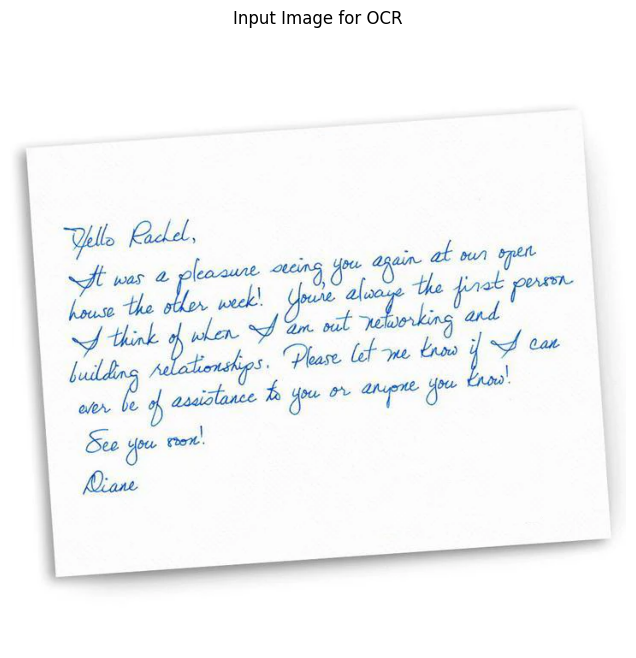

In [5]:
image_path = "test_images/ocr.png"  # Replace with your image path
image = Image.open(image_path).convert("RGB")
print(f"✅ Image loaded successfully!")
print(f"📏 Image size: {image.size}")

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.title("Input Image for OCR")
plt.show()

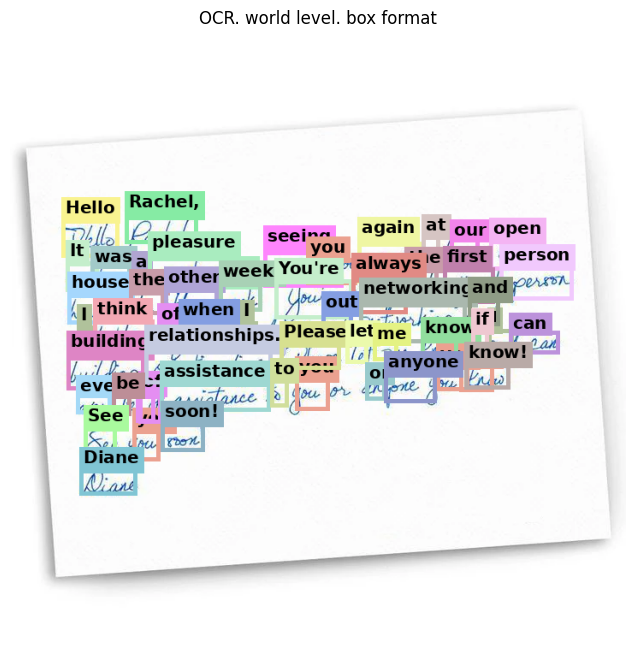

In [6]:
# detect in word level
# Define categories to detect
categories = [
    "word",
]
# inference
results = rex_model.inference(images=image, task="ocr_box", categories=categories)

result = results[0]
if result["success"]:
    predictions = result["extracted_predictions"]
    vis_image = RexOmniVisualize(
        image=image,
        predictions=predictions,
        font_size=20,
        draw_width=5,
        show_labels=True,
    )
    # display the visualization
    plt.figure(figsize=(10, 8))
    plt.imshow(vis_image)
    plt.axis("off")
    plt.title("OCR. world level. box format")
    plt.show()

else:
    print(f"Inference failed: {result['error']}")

## Example 2: OCR in box format (Text Line Level)


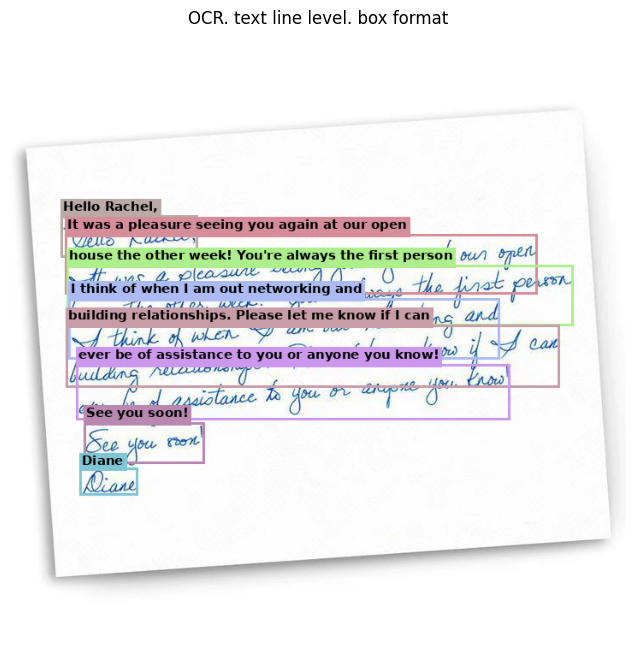

In [9]:
# detect in word level
# Define categories to detect
categories = [
    "text line",
]
# inference
results = rex_model.inference(images=image, task="ocr_box", categories=categories)

result = results[0]
if result["success"]:
    predictions = result["extracted_predictions"]
    vis_image = RexOmniVisualize(
        image=image,
        predictions=predictions,
        font_size=15,
        draw_width=3,
        show_labels=True,
    )
    # display the visualization
    plt.figure(figsize=(10, 8))
    plt.imshow(vis_image)
    plt.axis("off")
    plt.title("OCR. text line level. box format")
    plt.show()

else:
    print(f"Inference failed: {result['error']}")

## Example 3: OCR in Polygon format

Let's try polygon format for OCR tasks.

/home/jiangqing/miniconda3/envs/r1/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/home/jiangqing/miniconda3/envs/r1/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.05` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/home/jiangqing/miniconda3/envs/r1/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:653: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `1` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(


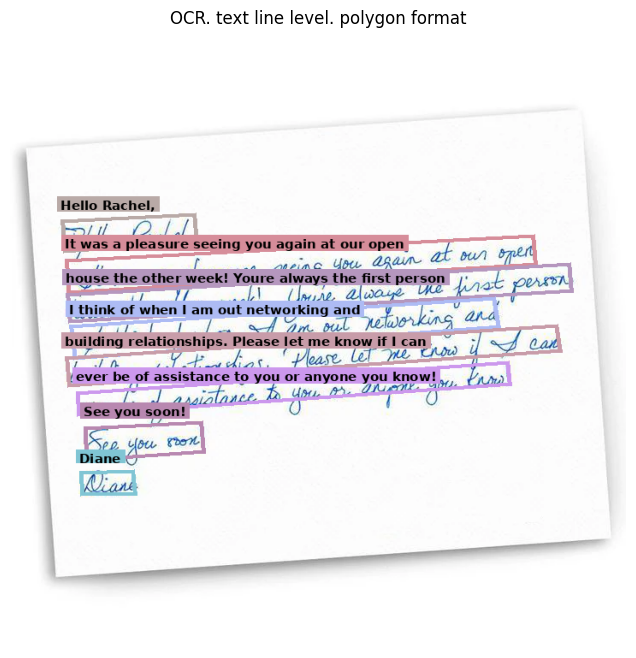

Raw output from Rex-Omni
<|object_ref_start|>Hello Rachel,<|object_ref_end|><|box_start|><83><305><302><294><306><344><87><358><|box_end|>, <|object_ref_start|>It was a pleasure seeing you again at our open<|object_ref_end|><|box_start|><89><369><851><328><855><379><92><425><|box_end|>, <|object_ref_start|>house the other week! Youre always the first person<|object_ref_end|><|box_start|><91><424><910><374><914><423><95><472><|box_end|>, <|object_ref_start|>I think of when I am out networking and<|object_ref_end|><|box_start|><96><475><788><429><796><481><104><532><|box_end|>, <|object_ref_start|>building relationships. Please let me know if I can<|object_ref_end|><|box_start|><90><526><889><474><895><519><94><577><|box_end|>, <|object_ref_start|>ever be of assistance to you or anyone you know!<|object_ref_end|><|box_start|><107><584><809><534><814><574><109><624><|box_end|>, <|object_ref_start|>See you soon!<|object_ref_end|><|box_start|><120><640><313><631><317><683><122><697><|box_en

In [12]:
# output polygon
# Define categories to detect
categories = [
    "text line",
]
# inference
results = rex_model.inference(images=image, task="ocr_polygon", categories=categories)

result = results[0]
if result["success"]:
    predictions = result["extracted_predictions"]
    vis_image = RexOmniVisualize(
        image=image,
        predictions=predictions,
        font_size=15,
        draw_width=5,
        show_labels=True,
    )
    # display the visualization
    plt.figure(figsize=(10, 8))
    plt.imshow(vis_image)
    plt.axis("off")
    plt.title("OCR. text line level. polygon format")
    plt.show()

else:
    print(f"Inference failed: {result['error']}")

print('Raw output from Rex-Omni')
print(results[0]['raw_output'])